<a href="https://colab.research.google.com/github/ZhiZheng0889/IVE/blob/main/IntrovertVsExtrovert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# For reproducibility
RANDOM_STATE = 42


In [ ]:
# 📁 Step 2: Load the Data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

train.head()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [ ]:
# 🧹 Step 3: Data Cleaning and Preprocessing

# Drop ID for training purposes
X = train.drop(['id', 'Personality'], axis=1)
y = train['Personality']
test_ids = test['id']
X_test = test.drop(['id'], axis=1)

# Encode target
y = y.map({'Introvert': 0, 'Extrovert': 1})

# Encode binary categorical variables
binary_cols = ['Stage_fear', 'Drained_after_socializing']
for col in binary_cols:
    X[col] = X[col].map({'Yes': 1, 'No': 0})
    X_test[col] = X_test[col].map({'Yes': 1, 'No': 0})

# Impute missing values using median for numeric and most_frequent for binary
imputer_numeric = SimpleImputer(strategy='median')
imputer_binary = SimpleImputer(strategy='most_frequent')

X[binary_cols] = imputer_binary.fit_transform(X[binary_cols])
X_test[binary_cols] = imputer_binary.transform(X_test[binary_cols])

X = pd.DataFrame(imputer_numeric.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(imputer_numeric.transform(X_test), columns=X_test.columns)

X.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0
2,6.0,1.0,1.0,0.0,0.0,3.0,0.0
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0
4,1.0,0.0,4.0,4.0,0.0,13.0,5.0


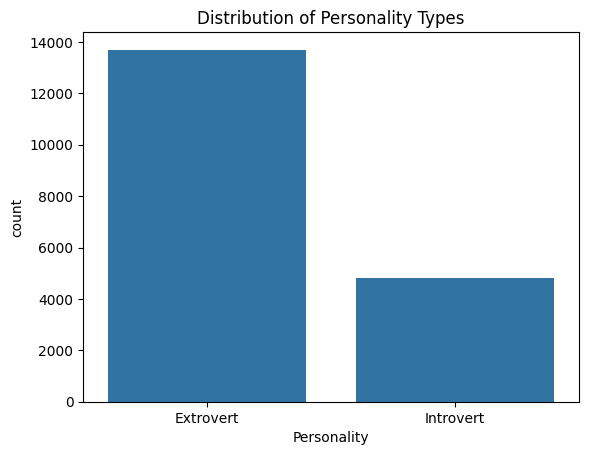

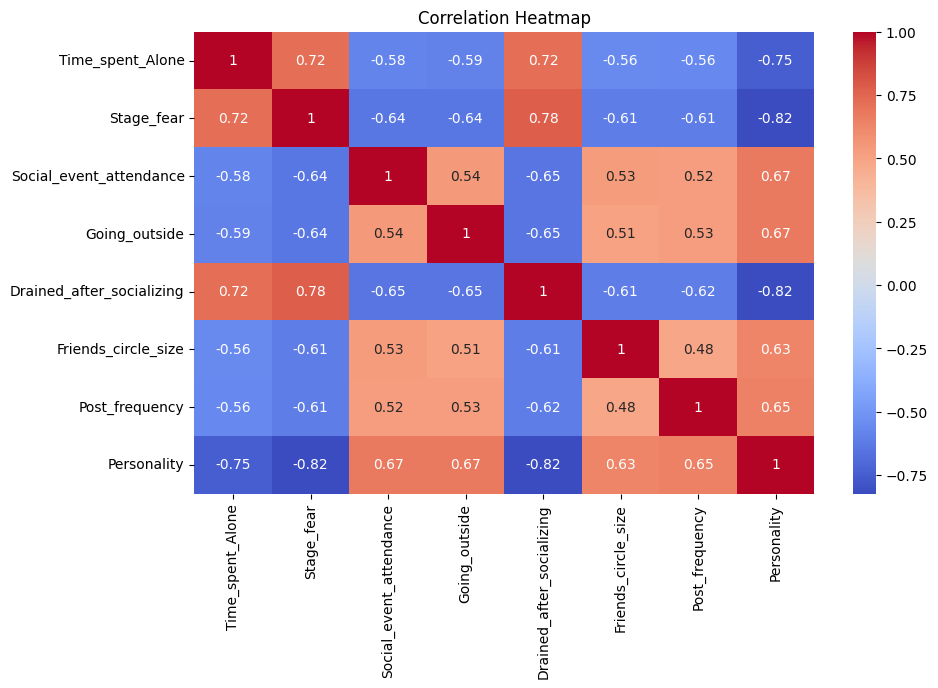

In [ ]:
# 📊 Step 4: Exploratory Data Analysis (EDA)

# Count of each class
sns.countplot(x=train['Personality'])
plt.title("Distribution of Personality Types")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       952
           1       0.97      0.98      0.98      2753

    accuracy                           0.96      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



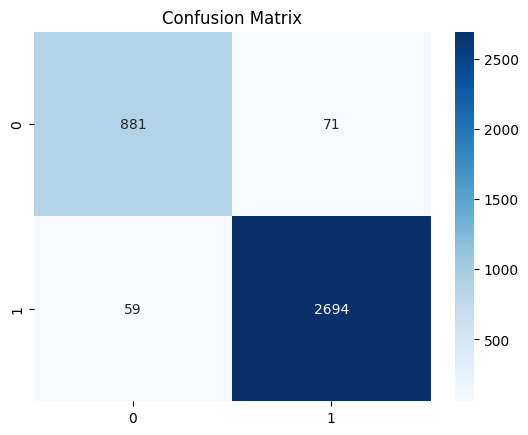

In [ ]:
# 🤖 Step 5: Model Training (Random Forest)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 🔍 Step 6: Cross-validation Accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Cross-validated Accuracy: 0.9639 ± 0.0045


In [ ]:
# 📤 Step 7: Predict on Test Set & Prepare Submission

test_preds = model.predict(X_test)
sample_submission['Personality'] = test_preds
sample_submission['Personality'] = sample_submission['Personality'].map({0: 'Introvert', 1: 'Extrovert'})

# Save to CSV
sample_submission.to_csv("final_submission.csv", index=False)
sample_submission.head()


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

sns.set(style="whitegrid", palette="muted")

# 📁 Step 2: Load Data (after uploading files in Colab sidebar)
train = pd.read_csv('/content/train.csv')
train.head()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [ ]:
# 🧹 Step 3: Preprocess Data for Unsupervised ML

# Drop ID and keep features only
features = train.drop(columns=['id', 'Personality'])

# Map binary categorical features to numeric
features['Stage_fear'] = features['Stage_fear'].map({'Yes': 1, 'No': 0})
features['Drained_after_socializing'] = features['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Impute missing values
imputer = SimpleImputer(strategy='median')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)


In [ ]:
# 🧠 Step 4: KMeans Clustering

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add clusters to DataFrame
train['Cluster'] = clusters


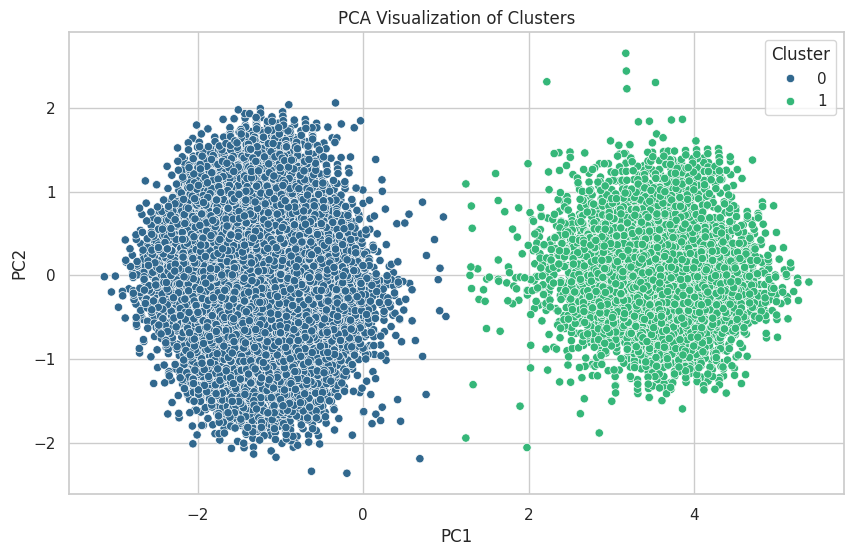

In [ ]:
# 📊 Step 5: PCA for 2D Visualization

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(features_scaled)

train['PC1'] = pca_result[:, 0]
train['PC2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title("PCA Visualization of Clusters")
plt.show()


In [ ]:
# 🎯 Step 6: Compare Clusters vs True Labels

# Encode actual labels
true_labels = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})

# Confusion matrix
cm = confusion_matrix(true_labels, train['Cluster'])
print("Confusion Matrix:\n", cm)

# Optional: Cluster label flip for better accuracy estimate
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
alt_accuracy = (cm[0,1] + cm[1,0]) / cm.sum()
print("Cluster Accuracy Estimate:", max(accuracy, alt_accuracy))


Confusion Matrix:
 [[  311  4514]
 [13431   268]]
Cluster Accuracy Estimate: 0.9687432519974087


In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

sns.set(style='whitegrid', palette='muted')


In [ ]:
# 📁 Step 2: Load and Prepare Data
train = pd.read_csv('/content/train.csv')

# Extract features and target
X = train.drop(columns=['id', 'Personality'])
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})

# Encode binary columns
X['Stage_fear'] = X['Stage_fear'].map({'Yes': 1, 'No': 0})
X['Drained_after_socializing'] = X['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Impute missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# 🤖 Step 3: Define Classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [ ]:
# 🧪 Step 4: Train and Evaluate Each Model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    acc = accuracy_score(y_val, preds)
    print(f"🔍 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_val, preds, target_names=["Introvert", "Extrovert"]))
    print("-" * 50)

    results.append((name, acc))


In [ ]:
# 📊 Step 5: Plot Accuracy Comparison
results.sort(key=lambda x: x[1], reverse=True)
model_names = [r[0] for r in results]
accuracies = [r[1] for r in results]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette='crest')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.xlim(0.5, 1.0)
plt.show()


In [ ]:
# 📦 Import Libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 📁 Load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# 🧹 Prepare Features and Target
X_train = train.drop(columns=["id", "Personality"])
y_train = train["Personality"]
X_test = test.drop(columns=["id"])

# 🔍 Feature Type Separation
categorical_features = ["Stage_fear", "Drained_after_socializing"]
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# 🏗️ Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

# 🚀 Modeling Pipeline
clf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 🎯 Fit Model
clf_pipeline.fit(X_train, y_train)

# 🔮 Predict on Test Set
y_pred = clf_pipeline.predict(X_test)

# 📤 Create Submission
submission = pd.DataFrame({
    "id": test["id"],
    "Personality": y_pred
})

# 💾 Save CSV
submission.to_csv("logistic_regression_submission.csv", index=False)

# ✅ Preview
print(submission.head())
